# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Importing Dataset

In [2]:
data= pd.read_csv(r'C:\Users\tirum\OneDrive\Desktop\internship project\concrete.csv')

In [3]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
data = data.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
                        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
                        'Fly Ash (component 3)(kg in a m^3 mixture)':'ash',
                        'Water (component 4)(kg in a m^3 mixture)':'water',
                        "Superplasticizer (component 5)(kg in a m^3 mixture)":'superplastic',
                        'Coarse Aggregate (component 6)(kg in a m^3 mixture)':'coarseagg',
                        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fineagg',
                        'Age (day)':'age',
                        'Concrete compressive strength(MPa, megapascals)':'strength'
})

In [5]:
data.columns = ['cement', 'slag', 'ash', 'Water','superplastic','coarseagg','fineagg','age','strength']

In [6]:
data

,cement,slag,ash,Water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [7]:
data.shape

(1030, 9)

# Data cleaning

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   Water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
data.isnull().sum()

cement          0
slag            0
ash             0
Water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

No null values

In [10]:
data.describe()

,cement,slag,ash,Water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Quartiles

# cement

In [11]:
from scipy import stats
Q1=data['cement'].quantile(q=0.25)
Q3=data['cement'].quantile(q=0.75)
print('1st Quartile (Q1) is:',Q1)
print('3rd Quartile (Q3) is:',Q3)
print('Interquartile range(IQR) is',stats.iqr(data['cement']))

1st Quartile (Q1) is: 192.375
3rd Quartile (Q3) is: 350.0
Interquartile range(IQR) is 157.625


In [12]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers limit in cement:',L_outliers)
print('Lower outliers limit in cement:',U_outliers)

Lower outliers limit in cement: -44.0625
Lower outliers limit in cement: 586.4375


<AxesSubplot:xlabel='cement'>

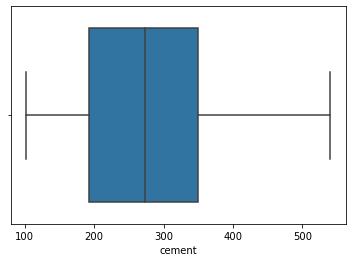

In [13]:
sns.boxplot(x='cement',data=data,orient='h')

# water

In [14]:
from scipy import stats
WQ1=data['Water'].quantile(q=0.25)
WQ3=data['Water'].quantile(q=0.75)
print('1st Quartile (Q1) is:',WQ1)
print('3rd Quartile (Q3) is:',WQ3)
print('Interquartile range(IQR) is',stats.iqr(data['Water']))

1st Quartile (Q1) is: 164.9
3rd Quartile (Q3) is: 192.0
Interquartile range(IQR) is 27.099999999999994


In [15]:
WL_outliers=WQ1-1.5*(WQ3-WQ1)
WU_outliers=WQ3+1.5*(WQ3-WQ1)
print('Lower outliers limit in water:',WL_outliers)
print('Lower outliers limit in water:',WU_outliers)

Lower outliers limit in water: 124.25000000000001
Lower outliers limit in water: 232.64999999999998


<AxesSubplot:xlabel='Water'>

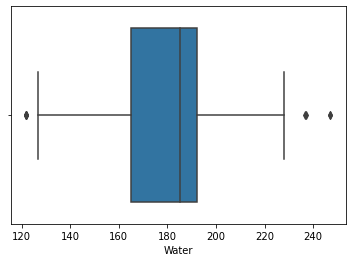

In [16]:
sns.boxplot(x='Water',data=data,orient='h')

Text(0.5, 1.0, 'Water')

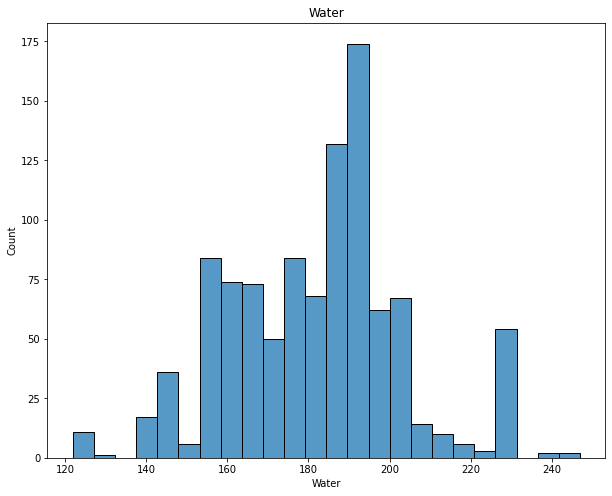

In [17]:
plt.figure(figsize=(10,8))
sns.histplot(data['Water']).set_title("Water")

# slag

In [18]:
Q1=data['slag'].quantile(q=0.25)
Q3=data['slag'].quantile(q=0.75)
print('1st Quartile (Q1) is:',Q1)
print('3rd Quartile (Q3) is:',Q3)
print('Interquartile range(IQR) is',stats.iqr(data['slag']))

1st Quartile (Q1) is: 0.0
3rd Quartile (Q3) is: 142.95
Interquartile range(IQR) is 142.95


In [19]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers limit in slag:',L_outliers)
print('Lower outliers limit in slag:',U_outliers)

Lower outliers limit in slag: -214.42499999999998
Lower outliers limit in slag: 357.375


<AxesSubplot:xlabel='slag'>

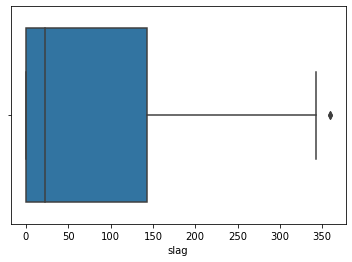

In [20]:
sns.boxplot(x='slag',data=data,orient='h')

# age

In [21]:
AQ1=data['age'].quantile(q=0.25)
AQ3=data['age'].quantile(q=0.75)
print('1st Quartile (AQ1) is:',AQ1)
print('3rd Quartile (AQ3) is:',AQ3)
print('Interquartile range(IQR) is',stats.iqr(data['age']))

1st Quartile (AQ1) is: 7.0
3rd Quartile (AQ3) is: 56.0
Interquartile range(IQR) is 49.0


In [22]:
AL_outliers=AQ1-1.5*(AQ3-AQ1)
AU_outliers=AQ3+1.5*(AQ3-AQ1)
print('Lower outliers limit in age:',AL_outliers)
print('Lower outliers limit in age:',AU_outliers)

Lower outliers limit in age: -66.5
Lower outliers limit in age: 129.5


<AxesSubplot:xlabel='age'>

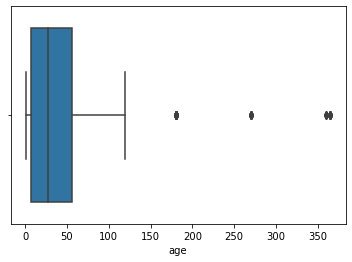

In [23]:
sns.boxplot(x='age',data=data,orient='h')

# ash

In [24]:
Q1=data['ash'].quantile(q=0.25)
Q3=data['ash'].quantile(q=0.75)
print('1st Quartile (Q1) is:',Q1)
print('3rd Quartile (Q3) is:',Q3)
print('Interquartile range(IQR) is',stats.iqr(data['ash']))

1st Quartile (Q1) is: 0.0
3rd Quartile (Q3) is: 118.3
Interquartile range(IQR) is 118.3


In [25]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers limit in ash:',L_outliers)
print('Lower outliers limit in ash:',U_outliers)

Lower outliers limit in ash: -177.45
Lower outliers limit in ash: 295.75


<AxesSubplot:xlabel='ash'>

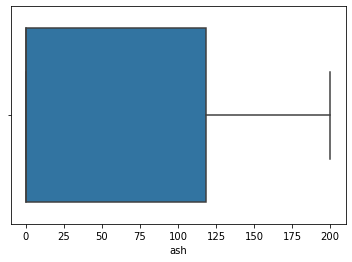

In [26]:
sns.boxplot(x='ash',data=data,orient='h')

<AxesSubplot:xlabel='strength', ylabel='Count'>

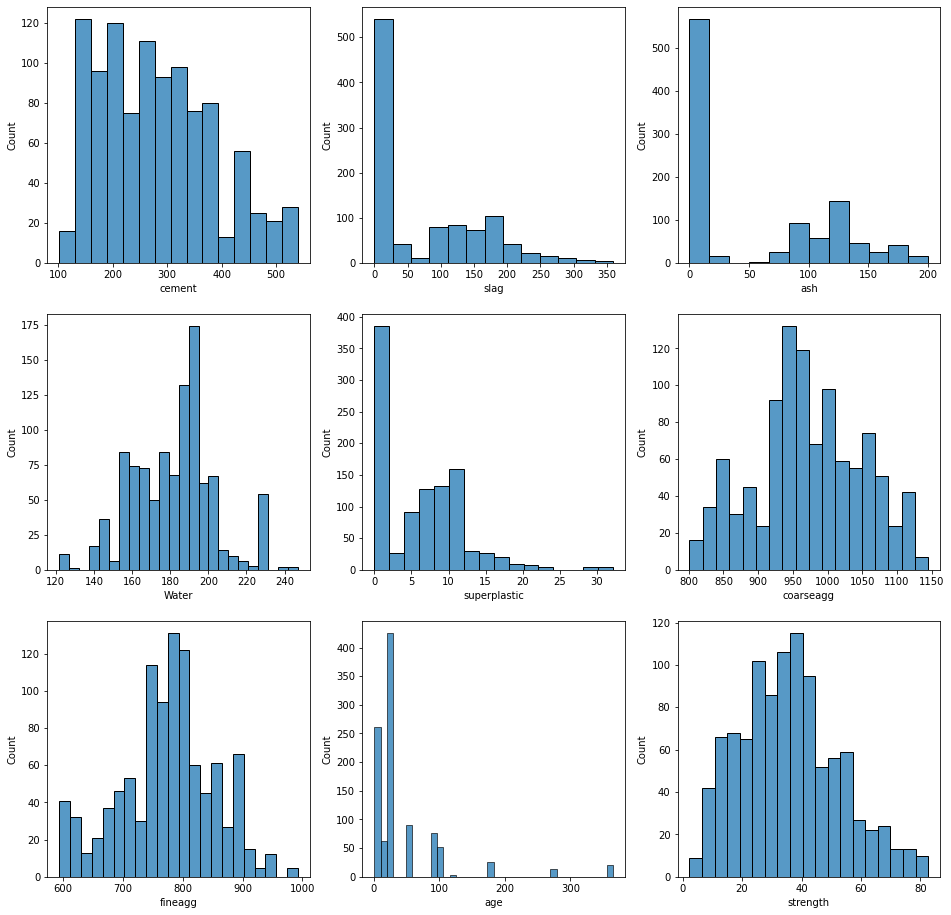

In [27]:
#distplot
fig,ax2=plt.subplots(3,3,figsize=(16,16))
sns.histplot(data['cement'],ax=ax2[0][0])
sns.histplot(data['slag'],ax=ax2[0][1])
sns.histplot(data['ash'],ax=ax2[0][2])
sns.histplot(data['Water'],ax=ax2[1][0])
sns.histplot(data['superplastic'],ax=ax2[1][1])
sns.histplot(data['coarseagg'],ax=ax2[1][2])
sns.histplot(data['fineagg'],ax=ax2[2][0])
sns.histplot(data['age'],ax=ax2[2][1])
sns.histplot(data['strength'],ax=ax2[2][2])

# Correlation between variables

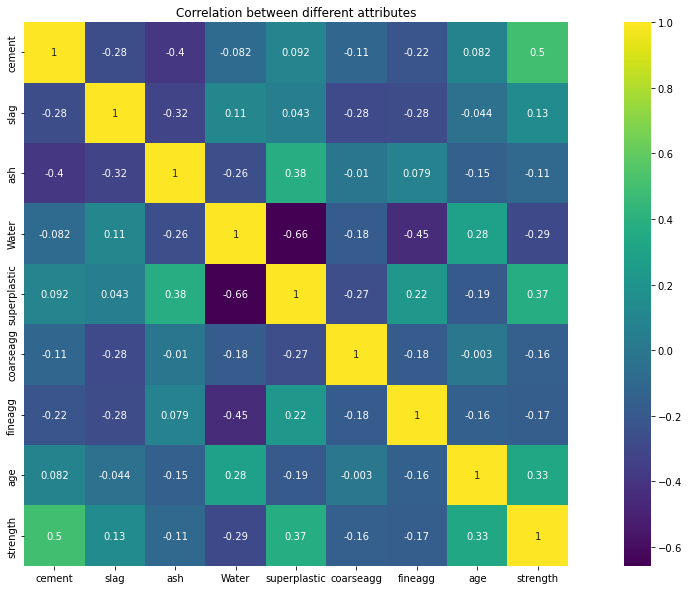

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

<AxesSubplot:>

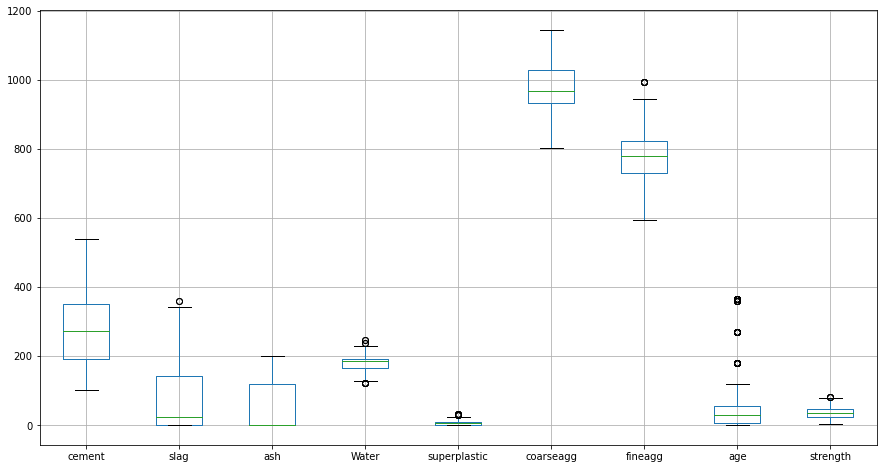

In [29]:
data.boxplot(figsize=(15,8))

# Replacing the qutliers by median

In [30]:
for cols in data.columns[:-1]:
    Q1=data[cols].quantile(0.25)
    Q3=data[cols].quantile(0.75)
    iqr=Q3-Q1
    low=Q1-1.5*iqr
    high=Q3+1.5*iqr
    data.loc[(data[cols]<low)|(data[cols]>high),cols]=data[cols].median()

<AxesSubplot:>

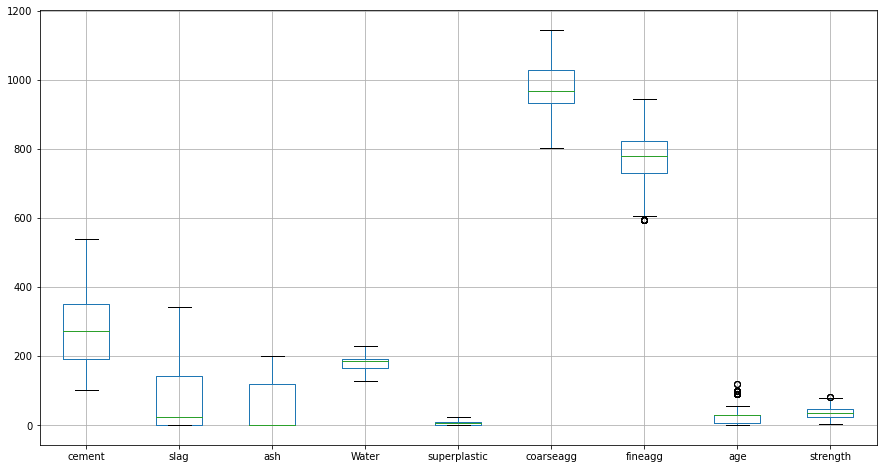

In [31]:
data.boxplot(figsize=(15,8))

Splitting the Data into independent and dependent attributes

In [32]:
X=data.drop('strength',axis=1)
Y=data['strength']

In [33]:
X

,cement,slag,ash,Water,superplastic,coarseagg,fineagg,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [34]:
Y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: strength, Length: 1030, dtype: float64

In [35]:
from scipy.stats import zscore
x=X.apply(zscore)
x_data=pd.DataFrame(x,columns=data.columns)

In [36]:
x_data

,cement,slag,ash,Water,superplastic,coarseagg,fineagg,age,strength
0,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,0.863154,-1.227306,-0.153159,NaN
1,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,1.056164,-1.227306,-0.153159,NaN
2,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159,NaN
3,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159,NaN
4,-0.790459,0.693195,-0.847144,0.502442,-1.091166,0.070527,0.673158,-0.153159,NaN
...,...,...,...,...,...,...,...,...,...
1025,-0.045645,0.501029,0.564545,-0.099698,0.534552,-1.323005,-0.053976,-0.153159,NaN
1026,0.392819,-0.858192,0.960068,0.696681,0.808549,-1.994680,0.519341,-0.153159,NaN
1027,-1.270088,0.775217,0.850635,0.536434,0.023090,-1.036064,0.094756,-0.153159,NaN
1028,-1.168610,1.329451,-0.847144,-0.293937,0.972948,0.214641,0.207894,-0.153159,NaN


Splitting The Dataset Into Train Set And Test Set

In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test , Y_train , Y_test = train_test_split(x,Y,test_size=0.3,random_state=1)

# Model Building

# Gradient Boosting Regressor

Training the model

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
model.fit(X_train,Y_train)

GradientBoostingRegressor()

Testing the Model

In [40]:
y_pred=model.predict(X_test)
print("Prediction made by Gradient Boosting Model:",y_pred)

Prediction made by Gradient Boosting Model: [21.04477264 11.0540898  24.93802964 15.09706139 35.11364269 64.58199108
 16.88267942 46.91376267 39.69978845 20.29262918 35.21289911 14.95686266
 36.78184264 30.85601521  7.34770117 27.6408574  35.03051287 59.76391896
 56.14803812 33.05149908 21.84076414 52.1361642  17.67671645 62.24226368
 59.23600929 41.13211954 34.07364711 32.87163905 36.03840606 13.81397028
 43.34066562 54.02772706 30.87924056 25.33567063 35.32248404 37.77816301
 17.74127717 28.27629849 23.63996804 17.16484579 39.75273174 14.35494827
 46.99056601 37.76444759 32.72559266 27.46629941 34.94034042 25.86784887
 32.36979266 51.89009464 26.60811278 37.30573428 55.57383723 45.00487233
 57.58443538  8.83975697 36.60960573 22.05773918 31.39855399 44.65348367
 43.29209558 41.41563669 52.7534638  48.72456403 21.49147335 35.38823538
 55.57383723 35.4237606  40.95674816 27.40721908 28.40697394 27.49882196
 37.84880261 14.65242726 67.84325433 58.59648765 54.74159594 13.03154726
 61.545

Model Evaluation

In [41]:
score=model.score(X_test,Y_test)
print("score of Gradient Boosting Model:",score)

score of Gradient Boosting Model: 0.880190281672208


In [42]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(Y_test,y_pred))
print("MSE:",metrics.mean_squared_error(Y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

MAE: 4.213350520644146
MSE: 31.402989685483906
RMSE: 5.603837050225845


Saving the Model

In [44]:
import pickle
pickle.dump(model,open("cement1.pkl","wb"))

In [45]:
model=pickle.load(open("cement1.pkl","rb"))